3
total = 119, vectorized = 65, dynamic_casting = 1, no_contiguous_first_dim = 53, dim0 = 53


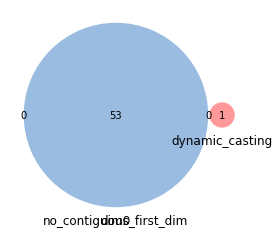

3
total = 68, vectorized = 66, dynamic_casting = 1, no_contiguous_first_dim = 2, dim0 = 1


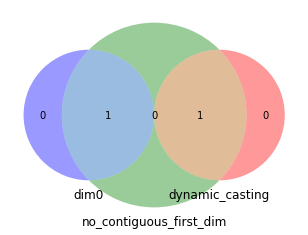

1
total = 1610, vectorized = 966, dynamic_casting = 644, no_contiguous_first_dim = 0, dim0 = 0


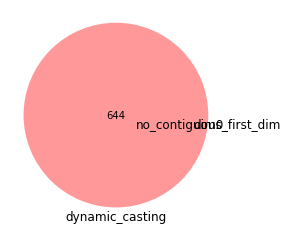

In [8]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

with open("resnet50.log") as f:
    lines = f.read()
forward, backward, optim = lines.split("==============================")
for m in [forward, backward, optim]:
    c = m.split("----------------------------")
    total = 0
    vectorized = 0
    dynamic_casting = set()
    no_contiguous_first_dim = set()
    dim0 = set()       
    non_empty = {}
    for i, lines in enumerate(c):
        lines = lines.strip().split('\n')
        d = {}
        for line in lines:
            key, value = line.split(" = ")
            if key in {'vec_size', 'ndim'}:
                d[key] = int(value)
            else:
                d[key] = bool(int(value))

        total += 1

        is_vectorized = 'vec_size' in d
        if is_vectorized:
            assert d['vec_size'] == 4
            vectorized += 1

        if d['needs_dynamic_casting']:
            dynamic_casting.add(i)
            non_empty['dynamic_casting'] = dynamic_casting
            
        if not d['has_contiguous_first_dim']:
            no_contiguous_first_dim.add(i)
            non_empty['no_contiguous_first_dim'] = no_contiguous_first_dim
            
        if not d['is_trivial_1d']:
            if d['ndim'] == 0:
                dim0.add(i)
            non_empty['dim0'] = dim0
            
    print(len(non_empty))

    print(f'total = {total}, vectorized = {vectorized}, dynamic_casting = {len(dynamic_casting)}, no_contiguous_first_dim = {len(no_contiguous_first_dim)}, dim0 = {len(dim0)}')
    venn3([dynamic_casting, no_contiguous_first_dim, dim0], ('dynamic_casting', 'no_contiguous_first_dim', 'dim0'))
    plt.show()